In [1]:
import pandas as pd
from scipy.stats import linregress
import matplotlib.pyplot as plt
import numpy as np

In [2]:
census_file = 'census_starter.csv'
mbd_file = 'mbd_train.csv'



In [3]:
census = pd.read_csv(census_file)
census.describe()
# pct_bb_YYYY = percentage of households with access to broadband (of any type) in year YYYY
# cfips = cfips code (for joining to mbd_train)
# pct_college_YYYY = percentage of population in year YYYY age 25+ with a 4 year degree
# pct_foreign_born_YYYY = percentage of population in year YYYY born outside the US in year
# pct_it_workers_YYYY = percentage of workforce in year YYYY that work in IT or information related industry
# median_hh_inc_YYYY = median hosuehold income in year YYYY

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
count,3142.000000,3142.000000,3142.000000,3141.000000,3141.000000,3142.000000,3142.000000,3142.000000,3142.000000,3141.000000,...,3142.000000,3141.000000,3142.000000,3141.000000,3141.000000,3142.000000,3141.000000,3142.000000,3140.000000,3140.000000
mean,69.920401,72.690866,75.398600,78.543298,80.539096,30383.649268,13.813399,14.005379,14.240452,14.631328,...,1.427148,1.382171,1.338956,1.309265,1.272684,49754.163908,51583.175422,53475.909612,55012.443312,58223.339490
std,9.702052,9.255863,8.846665,8.250864,7.889931,15162.508374,5.586649,5.630199,5.689780,5.776940,...,0.986985,0.942777,0.940891,0.990342,0.968579,13154.424871,13703.502202,14192.529173,14649.568591,15541.038914
min,24.500000,25.700000,34.800000,33.300000,37.000000,1001.000000,2.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,19264.000000,20188.000000,21504.000000,22292.000000,17109.000000
25%,64.200000,67.425000,70.500000,74.100000,76.400000,18177.500000,9.700000,9.900000,10.100000,10.500000,...,0.800000,0.800000,0.700000,0.700000,0.600000,41123.000000,42480.000000,44155.000000,45653.000000,48179.500000
50%,70.700000,73.600000,76.450000,79.600000,81.700000,29176.000000,12.800000,13.000000,13.250000,13.600000,...,1.300000,1.300000,1.200000,1.200000,1.100000,48065.500000,49888.000000,51757.500000,52842.000000,55907.000000
75%,76.400000,78.800000,81.400000,84.100000,85.900000,45080.500000,16.800000,17.100000,17.300000,17.900000,...,1.900000,1.800000,1.800000,1.800000,1.700000,55763.500000,57611.000000,59867.250000,61500.750000,64930.000000
max,94.600000,95.500000,96.000000,97.100000,97.600000,56045.000000,43.700000,48.000000,45.400000,43.000000,...,17.400000,11.700000,10.500000,15.200000,15.200000,129588.000000,136268.000000,142299.000000,147111.000000,156821.000000


In [4]:
mbd = pd.read_csv(mbd_file)
mbd.describe()
# cfips - key to join to the census data
# county_name = name of county associated with cfips code
# state = state name
# first_day_of_month = timestamp of record of Microbusiness density & 'Active'
# microbusiness_density = count of microbusinesses per 100 people age 18+ *** TARGET VARIABLE ***
# active = count of active microbusiness 

,cfips,microbusiness_density,active
count,122265.000000,122265.000000,1.222650e+05
mean,30376.037640,3.817671,6.442858e+03
std,15143.508721,4.991087,3.304001e+04
min,1001.000000,0.000000,0.000000e+00
25%,18177.000000,1.639344,1.450000e+02
50%,29173.000000,2.586543,4.880000e+02
75%,45077.000000,4.519231,2.124000e+03
max,56045.000000,284.340030,1.167744e+06


In [5]:
# rename to make it easier to type faster
mbd = mbd.rename(columns={'microbusiness_density':'mbd'})
# get the population from the count of active MB and the MBD
mbd['pop'] = mbd['active'] / mbd['mbd'] * 100
# group by the county and get some basic info 
mbd_by_county = mbd.groupby('cfips').agg({'mbd':['size','mean','std','min','max'],'pop':['mean','std']})
# renmae column to get rid of multi-level columns
mbd_by_county.columns = ['_'.join(col).strip() for col in mbd_by_county.columns.values]

mbd_by_county.head()

,mbd_size,mbd_mean,mbd_std,mbd_min,mbd_max,pop_mean,pop_std
cfips,,,,,,,
1001,39,3.164535,0.164113,2.884870,3.463856,42068.384628,328.739611
1003,39,7.889811,0.365452,7.239156,8.573463,165463.205696,4347.405167
1005,39,1.102521,0.077298,0.982994,1.232074,20160.897057,290.460128
1007,39,1.270834,0.039863,1.186877,1.343183,17844.102651,32.557222
1009,39,1.676951,0.096125,1.536999,1.852060,44255.589909,98.716116


In [6]:
# create a rank of dates for each county
mbd['date_order'] = mbd.groupby(['cfips']).rank()['first_day_of_month'] - 1
# create the same rank but descending
mbd['date_order_desc'] = mbd.groupby(['cfips']).rank(ascending=False)['first_day_of_month'] - 1

# this is to get the slope of X = months since start and y = mbd density
# rate of change in MBD per month
slope_mbd_v_time = mbd.groupby('cfips').apply(lambda v: linregress(v['date_order'], v['mbd'])[0])
# get 12 most recent months
mbd_recent = mbd[mbd['date_order_desc'] <= 12]
# get the rate of change in MBD over the last 12 months
slope_mbd_v_time_recent = mbd_recent.groupby('cfips').apply(lambda v: linregress(v['date_order'], v['mbd'])[0])


# change in MBD by month since start of tracking
mbd_by_county['slope'] = slope_mbd_v_time
# change in MBD by month since 
mbd_by_county['slope_recent'] = slope_mbd_v_time_recent 

mbd_by_county.head()

,mbd_size,mbd_mean,mbd_std,mbd_min,mbd_max,pop_mean,pop_std,slope,slope_recent
cfips,,,,,,,,,
1001,39,3.164535,0.164113,2.884870,3.463856,42068.384628,328.739611,0.013204,0.020580
1003,39,7.889811,0.365452,7.239156,8.573463,165463.205696,4347.405167,0.023416,0.063003
1005,39,1.102521,0.077298,0.982994,1.232074,20160.897057,290.460128,0.005711,0.005909
1007,39,1.270834,0.039863,1.186877,1.343183,17844.102651,32.557222,-0.000822,0.009638
1009,39,1.676951,0.096125,1.536999,1.852060,44255.589909,98.716116,0.008189,0.009375


Text(0.5, 1.0, 'Histogram of Average Microbusiness Density')

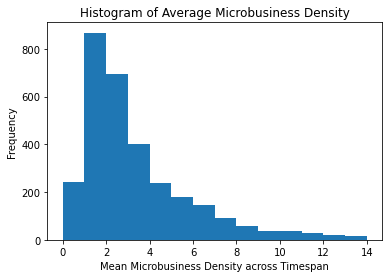

In [7]:
#%% histogram of MBDs

plt.hist(mbd_by_county['mbd_mean'], np.arange(0,15,1))
plt.xlabel('Mean Microbusiness Density across Timespan')
plt.ylabel('Frequency')
plt.title('Histogram of Average Microbusiness Density')

Text(0.5, 1.0, 'Histogram Change in MBD from 2022-10-01 to 2019-08-01')

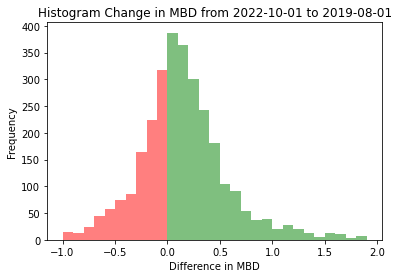

In [8]:
#%% histogram of amount change between start & end of time
mbd[mbd['date_order'] == min(mbd['date_order'])]
# overly complicated way to grab the first row of each cfips based on the smalled value of date+order
first_mbd = mbd.loc[mbd.groupby('cfips')['date_order'].idxmin()][['cfips','mbd']]
# overly complicated way to grab the first row of each cfips based on the largest value of date+order
last_mbd = mbd.loc[mbd.groupby('cfips')['date_order'].idxmax()][['cfips','mbd']]

first_mbd = first_mbd.set_index('cfips')
last_mbd = last_mbd.set_index('cfips')

mbd_by_county['first_mbd'] = first_mbd
mbd_by_county['last_mbd'] = last_mbd
mbd_by_county['mbd_delta'] = last_mbd - first_mbd

# get bool of increase or decrease in MBD 
mbd_by_county['mbd_delta_sign'] = mbd_by_county['mbd_delta'] > 0
# count the positives
counties_with_increase = mbd_by_county['mbd_delta_sign'].sum()
# count the negatives
counties_with_decrease = (~mbd_by_county['mbd_delta_sign']).sum()

delta_bins = np.arange(-1,2,0.1)
# plot counties with increase in MBD
plt.hist(mbd_by_county[mbd_by_county['mbd_delta_sign']]['mbd_delta'], color='green', alpha=0.5, bins=delta_bins)
# plot counties with decrease in mbd
plt.hist(mbd_by_county[~mbd_by_county['mbd_delta_sign']]['mbd_delta'], color='red', alpha=0.5, bins=delta_bins)

# plt.hist(mbd_by_county['mbd_delta'], np.arange(-0.7,1.5,0.1), color=colors)

plt.xlabel('Difference in MBD')
plt.ylabel('Frequency')
plt.title('Histogram Change in MBD from 2022-10-01 to 2019-08-01')


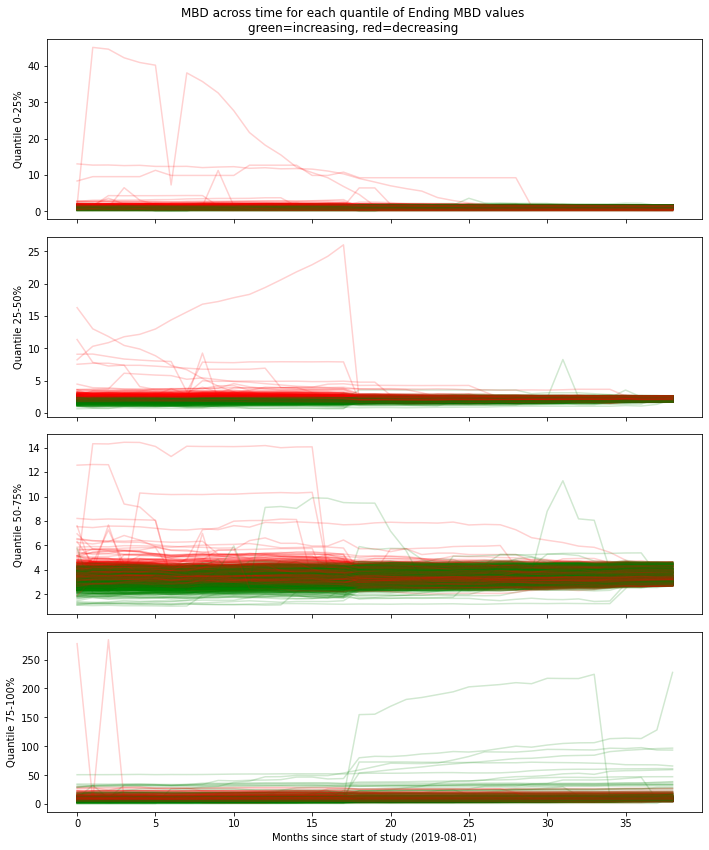

In [10]:
#%% plot x=months(0-39) vs y=MBD of all counties
last_date_order = int(max(mbd['date_order']))
final_mbd_quantiles = np.quantile(mbd[mbd['date_order'] == last_date_order]['mbd'], [0.25,0.5,0.75])


num_q = 4
mbd_by_county['final_mbd_quantile'] = pd.qcut(mbd_by_county['last_mbd'], q=num_q, labels=False)



fig, axs = plt.subplots(num_q,1, sharex=True, sharey=False, figsize=(10,12))
for q in range(num_q):
    # row = q // 2
    # col = q % 2
    cfips = list(mbd_by_county[mbd_by_county['final_mbd_quantile'] == q].index)
    for cfip in cfips:
        this_cfip = mbd[mbd['cfips'] == cfip]
        slope = mbd_by_county.loc[cfip,'slope']
        if slope > 0:
            color = 'green'
        else:
            color = 'red'
        axs[q].plot(this_cfip['date_order'], this_cfip['mbd'], alpha=0.18, color=color, label=f'Quantile {q+1}')
        axs[q].set_label('MBD')
        
plt.suptitle('MBD across time for each quantile of Ending MBD values\ngreen=increasing, red=decreasing')
axs[q].set_xlabel('Months since start of study (2019-08-01)')
axs[0].set_ylabel('Quantile 0-25%')
axs[1].set_ylabel('Quantile 25-50%')
axs[2].set_ylabel('Quantile 50-75%')
axs[3].set_ylabel('Quantile 75-100%')

# plt.subtitle('Line Graph for Each Quantile Rank')
plt.xticks(range(0, last_date_order + 1, 5))
plt.tight_layout()
plt.show()
# cfips = list(mbd_by_county.index)
# for cfip in cfips[0:100]:
#     this_cfip = mbd[mbd['cfips'] == cfip]
#     slope = mbd_by_county.loc[cfip,'slope']
#     if slope > 0:
#         color = 'green'
#     else:
#         color = 'red'
#     plt.plot(this_cfip['date_order'], this_cfip['mbd'], alpha=0.18, color=color)
    
# plt.xlabel('Months since start of study (2019-08-01)')
# plt.ylabel('Microbusiness''s per 100 people')
# plt.title('Microbusiness density of each County')